<a href="https://colab.research.google.com/github/alexanderquispe/Diplomado_PUCP/blob/group_4_ass_10_2024/Lecture_14/Assignment_10/group_4_ass_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Get the 15 variables from this raster for all Peru departments polygons

## 1.1 Install and import

In [3]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.7 MB/s eta 0:00:00


In [4]:
%pip install geopandas matplotlib shapely rasterio numpy pandas sklearn-xarray -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
!pip install ipywidgets
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console dejavu execute kernel kernelspec migrate nbclassic
nbconvert nbextension notebook run server serverextension troubleshoot trust

Jupyter command `jupyter-labextension` not found.


In [6]:
pip install rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.6 MB/s eta 0:00:00


In [7]:
%pip install geopandas matplotlib shapely rasterio numpy pandas sklearn-xarray -q
%pip install git+https://github.com/jgrss/geowombat  -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.0 MB/s eta 0:00:00


In [8]:
import geopandas as gpd
from rasterstats import zonal_stats
import pandas as pd
import geowombat as gw

In [9]:
import geopandas as gpd
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from shapely.geometry import mapping
import rasterio
import rasterio

# import plotting
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

import os
from rasterio.mask import mask

## 1.2. Set up and load

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
import geopandas as gpd

# Ruta al shapefile
shapefile_path = '/content/drive/MyDrive/Assign 10/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp'

# Leer el shapefile usando Geopandas
departments = gpd.read_file(shapefile_path)

# Transformar el CRS de los departamentos al CRS del raster si es necesario
# Asumiendo que los rasters están en 'esri:54009'
departments = departments.to_crs('esri:54009')

print(departments.head())

  CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0   06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1   06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2   06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3   06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4   06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   

   UBIGEO IDPROV  CODIGO  CNT_CCPP    DESCRIPCIO           DESCARGAR  \
0  060504   0605  060504        50      GUZMANGO  www.geogpsperu.com   
1  061105   0611  061105        15      EL PRADO  www.geogpsperu.com   
2  061109   0611  061109        41        NIEPOS  www.geogpsperu.com   
3  061110   0611  061110        48  SAN GREGORIO  www.geogpsperu.com   
4  061203   0612  061203         9      SAN LUIS  www.geogpsperu.com   

    WHATSAPP                  CONTACTO  \
0  931381206  juan.suyo@geogpsperu.com   
1  931381206  juan.suyo@geogpsperu.com

In [12]:
import rasterio
from rasterio.merge import merge
import rasterio
from rasterio.mask import mask
import pandas as pd

In [13]:
# Rutas a los archivos raster
raster_files = ['/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R10_C10.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R10_C11.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R10_C12.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C11.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C12.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R12_C11.tif',
                '/content/drive/MyDrive/Assign 10//tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R12_C12.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R9_C10.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R9_C11.tif',
                '/content/drive/MyDrive/Assign 10/tif_files_group4/GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R9_C12.tif']

In [14]:
from rasterstats import zonal_stats
# Inicializar lista para almacenar los resultados de cada raster
all_stats = []
# Iterar sobre cada archivo raster
for raster_path in raster_files:
    # Calcular estadísticas zonales
    stats = zonal_stats(departments, raster_path, stats="count sum", categorical=True, all_touched=True)
    # Convertir estadísticas a DataFrame
    stats_df = pd.DataFrame(stats)
    # Concatenar con la geometría y la información de los departamentos
    df = pd.concat([departments.reset_index(drop=True), stats_df], axis=1)
    all_stats.append(df)

In [15]:
# Concatenar todos los DataFrames en all_stats en un único DataFrame
final_df = pd.concat(all_stats, ignore_index=True)

# Verificar el resultado
print(final_df.head())
print(f"Total de filas en el DataFrame consolidado: {len(final_df)}")

  CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0   06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1   06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2   06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3   06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4   06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   

   UBIGEO IDPROV  CODIGO  ...  11  12  13  21  22  23  14  24  15  25  
0  060504   0605  060504  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1  061105   0611  061105  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2  061109   0611  061109  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3  061110   0611  061110  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4  061203   0612  061203  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 34 columns]
Total de filas en el DataFrame consolidado: 18740


In [16]:
# Verificar si hay valores nulos o datos faltantes que necesiten ser tratados
print(final_df.isnull().sum())

CCDD              0
NOMBDEP           0
CCPP              0
NOMBPROV          0
CCDI              0
NOMBDIST          0
CAPITAL          20
UBIGEO            0
IDPROV            0
CODIGO            0
CNT_CCPP          0
DESCRIPCIO        0
DESCARGAR         0
WHATSAPP          0
CONTACTO          0
geometry          0
count             0
sum           16773
0             16787
1             16817
2             16797
3             16803
4             17555
5             17125
11            16800
12            17956
13            17995
21            18355
22            18619
23            18521
14            18565
24            18682
15            18731
25            18739
dtype: int64


In [17]:
# Reemplazar todos los valores NaN por 0 en todo el DataFrame
final_df.fillna(0, inplace=True)

# Verificar el resultado después del reemplazo
print(final_df.head())

  CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0   06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1   06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2   06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3   06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4   06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   

   UBIGEO IDPROV  CODIGO  ...   11   12   13   21   22   23   14   24   15  \
0  060504   0605  060504  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  061105   0611  061105  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  061109   0611  061109  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  061110   0611  061110  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  061203   0612  061203  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    25  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 34 columns]


In [18]:
final_df

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,...,11,12,13,21,22,23,14,24,15,25
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18735,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18736,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18737,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18738,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cálculo del porcentaje de cobertura de diferentes MSZ (Zonas de Asentamiento Morfológico) representadas en un raster para cada uno de los polígonos:

In [19]:
#1. Definition of the pixel area. We establish that each pixel represents 100 ^2 (The spatial raster dataset delineates the boundaries of the human settlements at 10m resolution).

pixel_area = 100

#2. Iteration on each 15 cathegories of MSZ
    #We want to iterate on each 15 cathegories to calculate the cover percentage of each of the geographical areas. For that, we create a new column in final_df (MSZ_[cathegory]cogerage)


for category in range(1, 16):  # Asumiendo 15 categorías de MSZ
    # Usign .apply we apply a function to each row. In each row, we try to obtain the correspondent value to the MSZ (row.get(str(cathegory), 0))
    # (we count the pixels on each row). We then multiply the pixels by the pixel area so we can obtain the total area covered by that MSZ cathegory in M2.
    #We divide that area by the polygon area (row[geometry]area) so we calculate which fraction of the polygon is covered by the MSZ.
 final_df[f'MSZ_{category}_coverage'] = final_df.apply(
        lambda row: ((row.get(str(category), 0) * pixel_area) / row['geometry'].area) * 100 if str(category) in row else 0, #We multiply the result by 100 so we see the percentage
        axis=1
    )

In [ ]:
print(final_df.columns) #We see that we now have a new column for each cathegory of MSZ.

Index([           'CCDD',         'NOMBDEP',            'CCPP',
              'NOMBPROV',            'CCDI',        'NOMBDIST',
               'CAPITAL',          'UBIGEO',          'IDPROV',
                'CODIGO',        'CNT_CCPP',      'DESCRIPCIO',
             'DESCARGAR',        'WHATSAPP',        'CONTACTO',
              'geometry',           'count',             'sum',
                       0,                 1,                 2,
                       3,                 4,                 5,
                      11,                12,                13,
                      21,                22,                23,
                      14,                24,                15,
                      25,  'MSZ_1_coverage',  'MSZ_2_coverage',
        'MSZ_3_coverage',  'MSZ_4_coverage',  'MSZ_5_coverage',
        'MSZ_6_coverage',  'MSZ_7_coverage',  'MSZ_8_coverage',
        'MSZ_9_coverage', 'MSZ_10_coverage', 'MSZ_11_coverage',
       'MSZ_12_coverage', 'MSZ_13_covera

#2. choropleth map using folium for these 15 variables

In [62]:

!pip install mapclassify

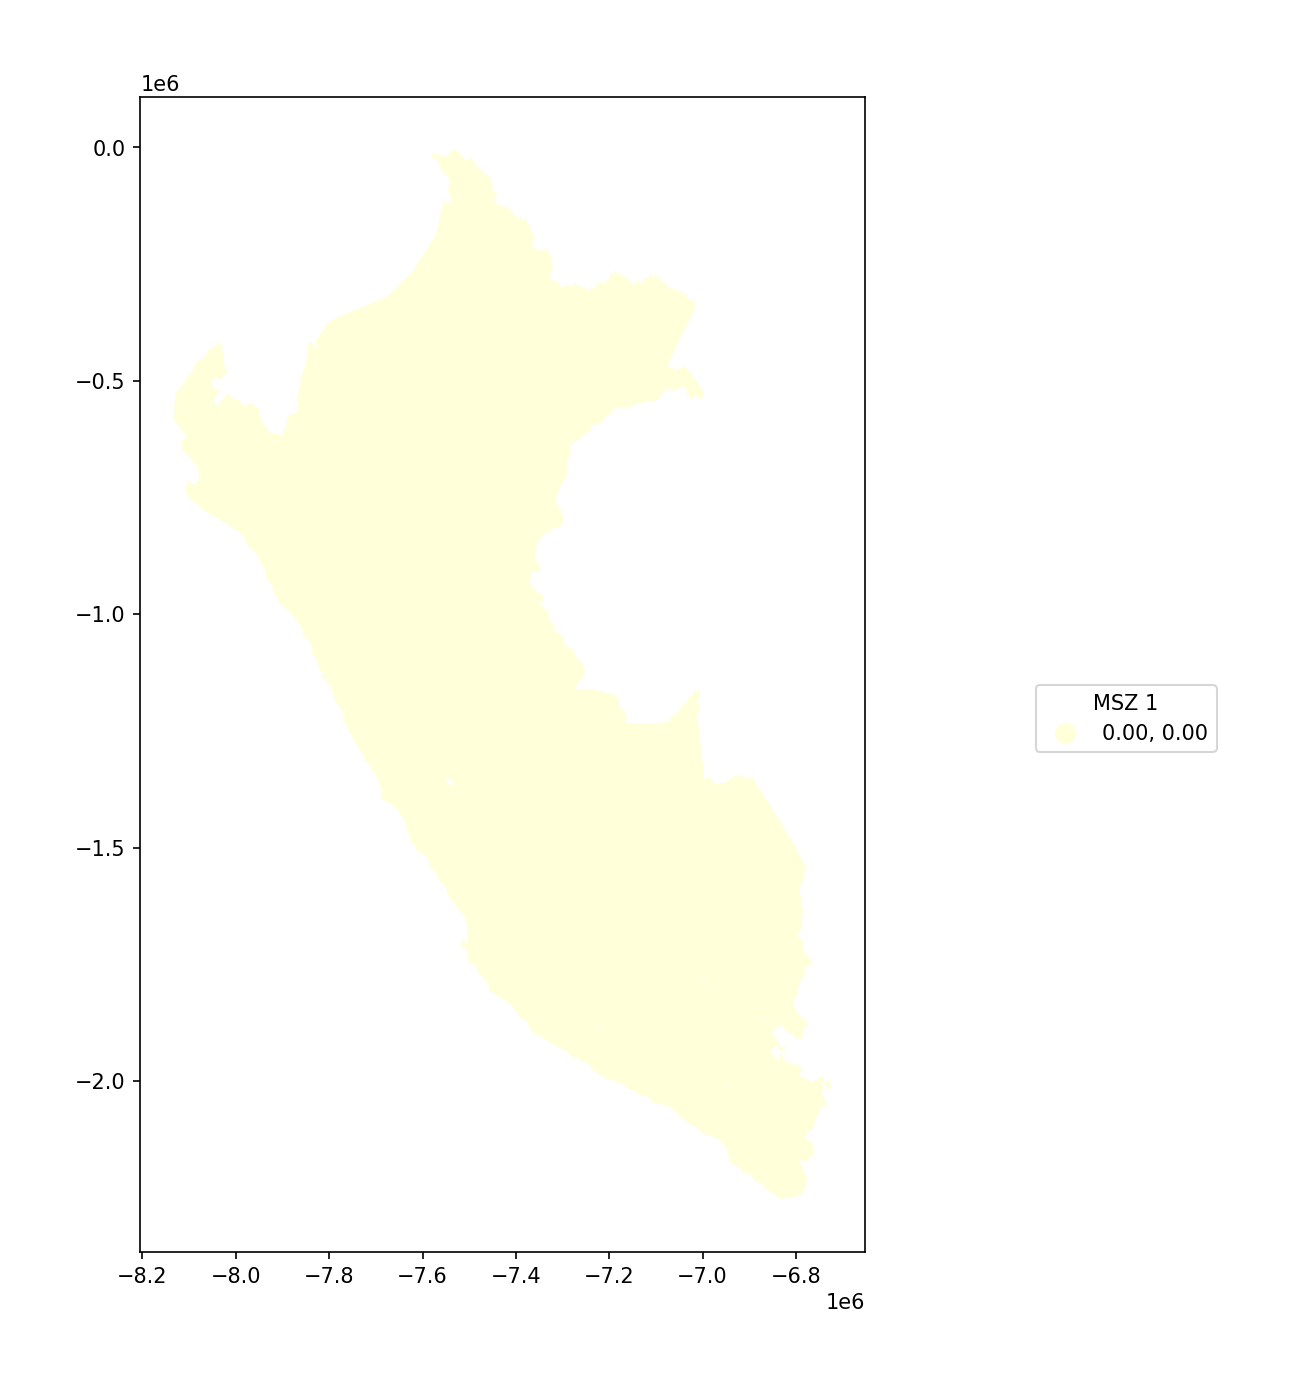

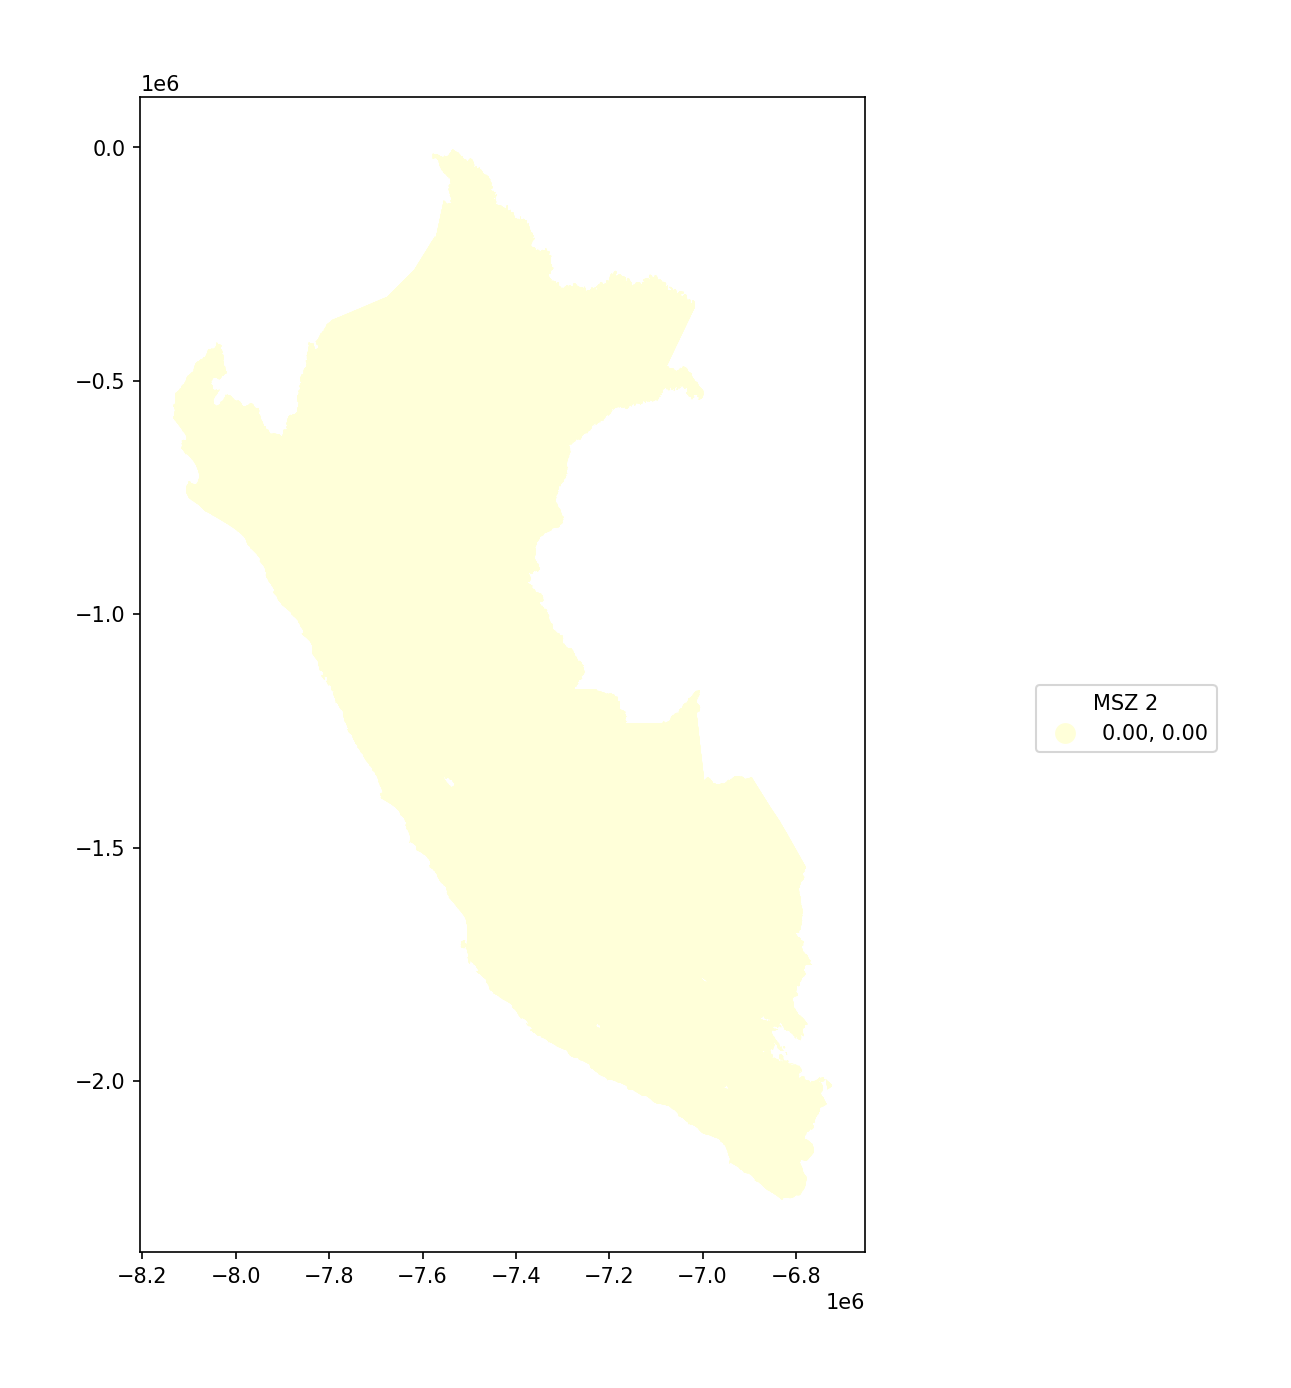

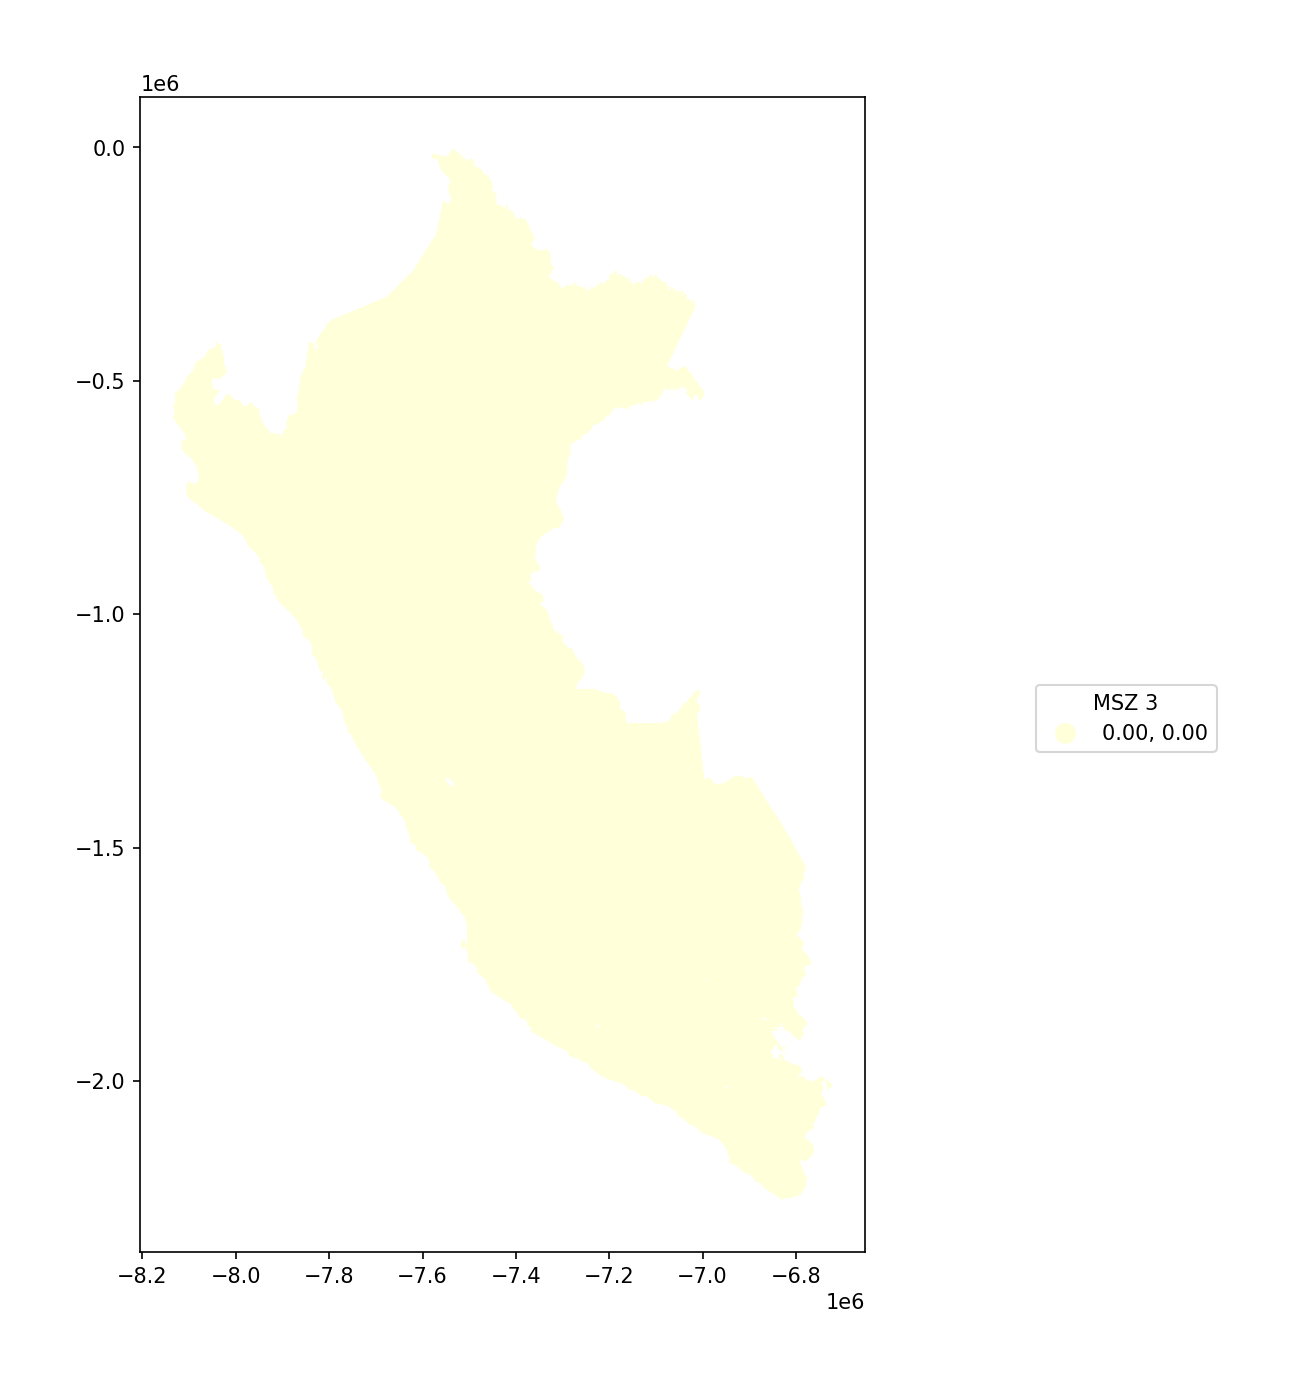

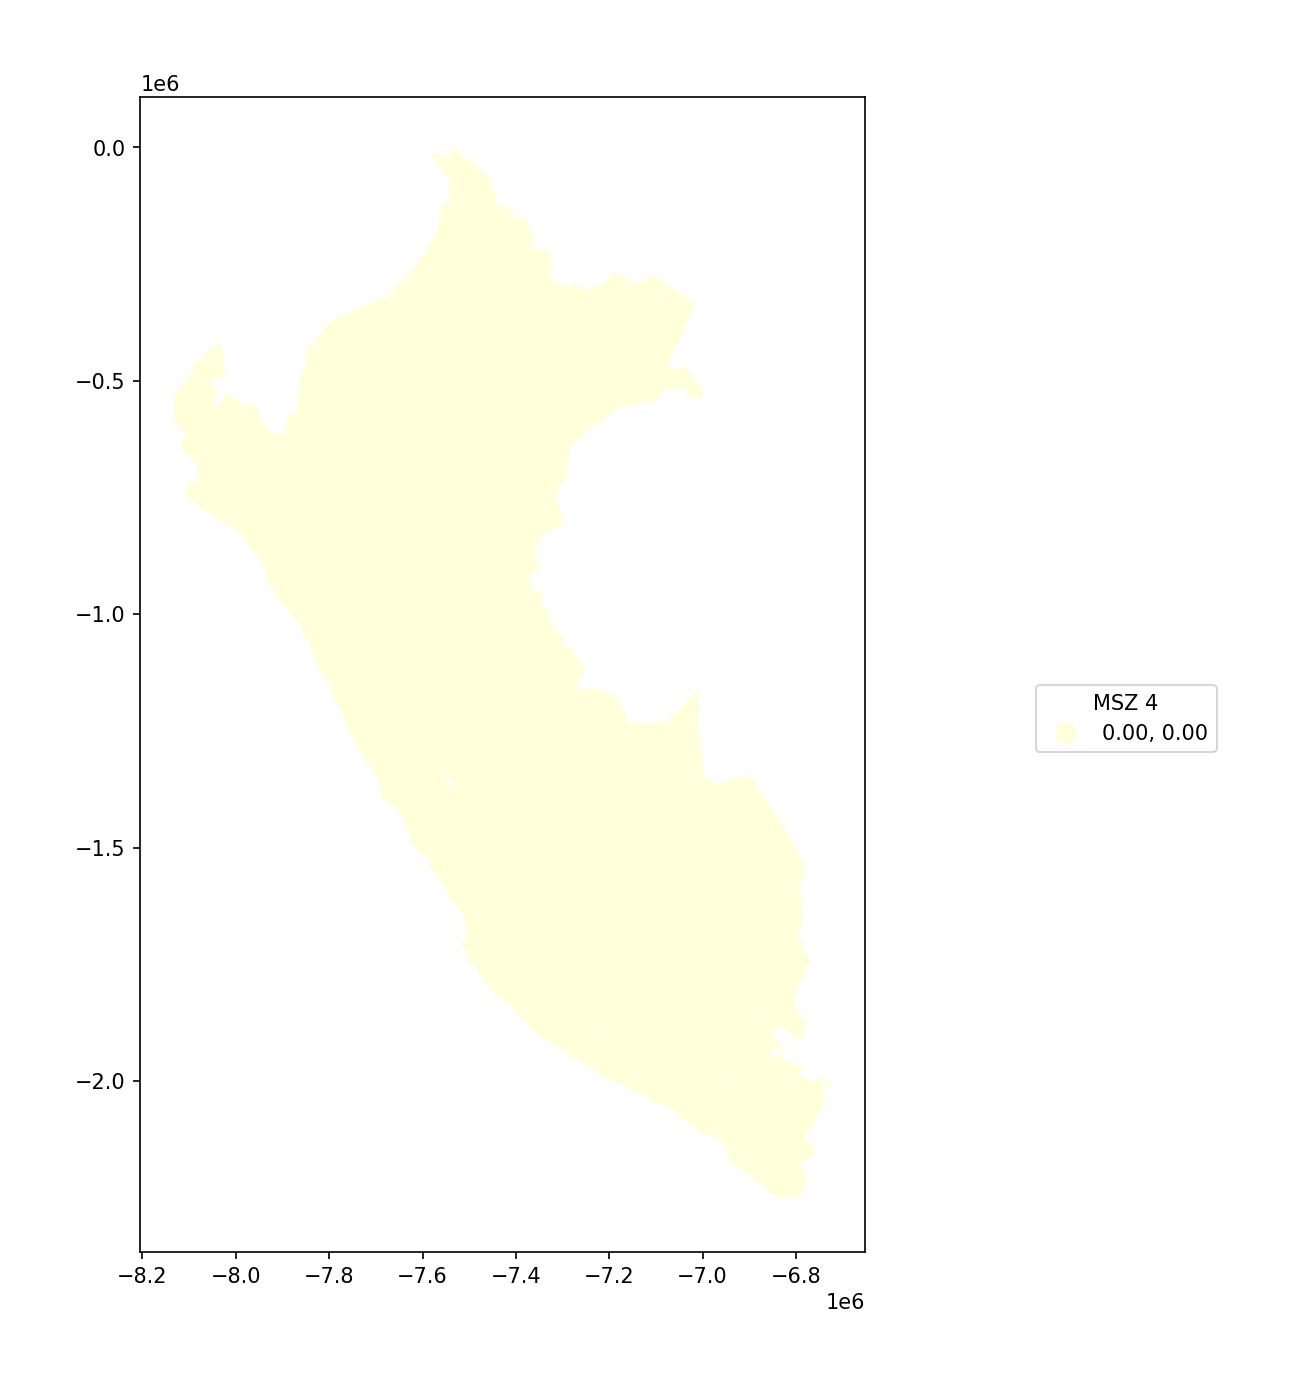

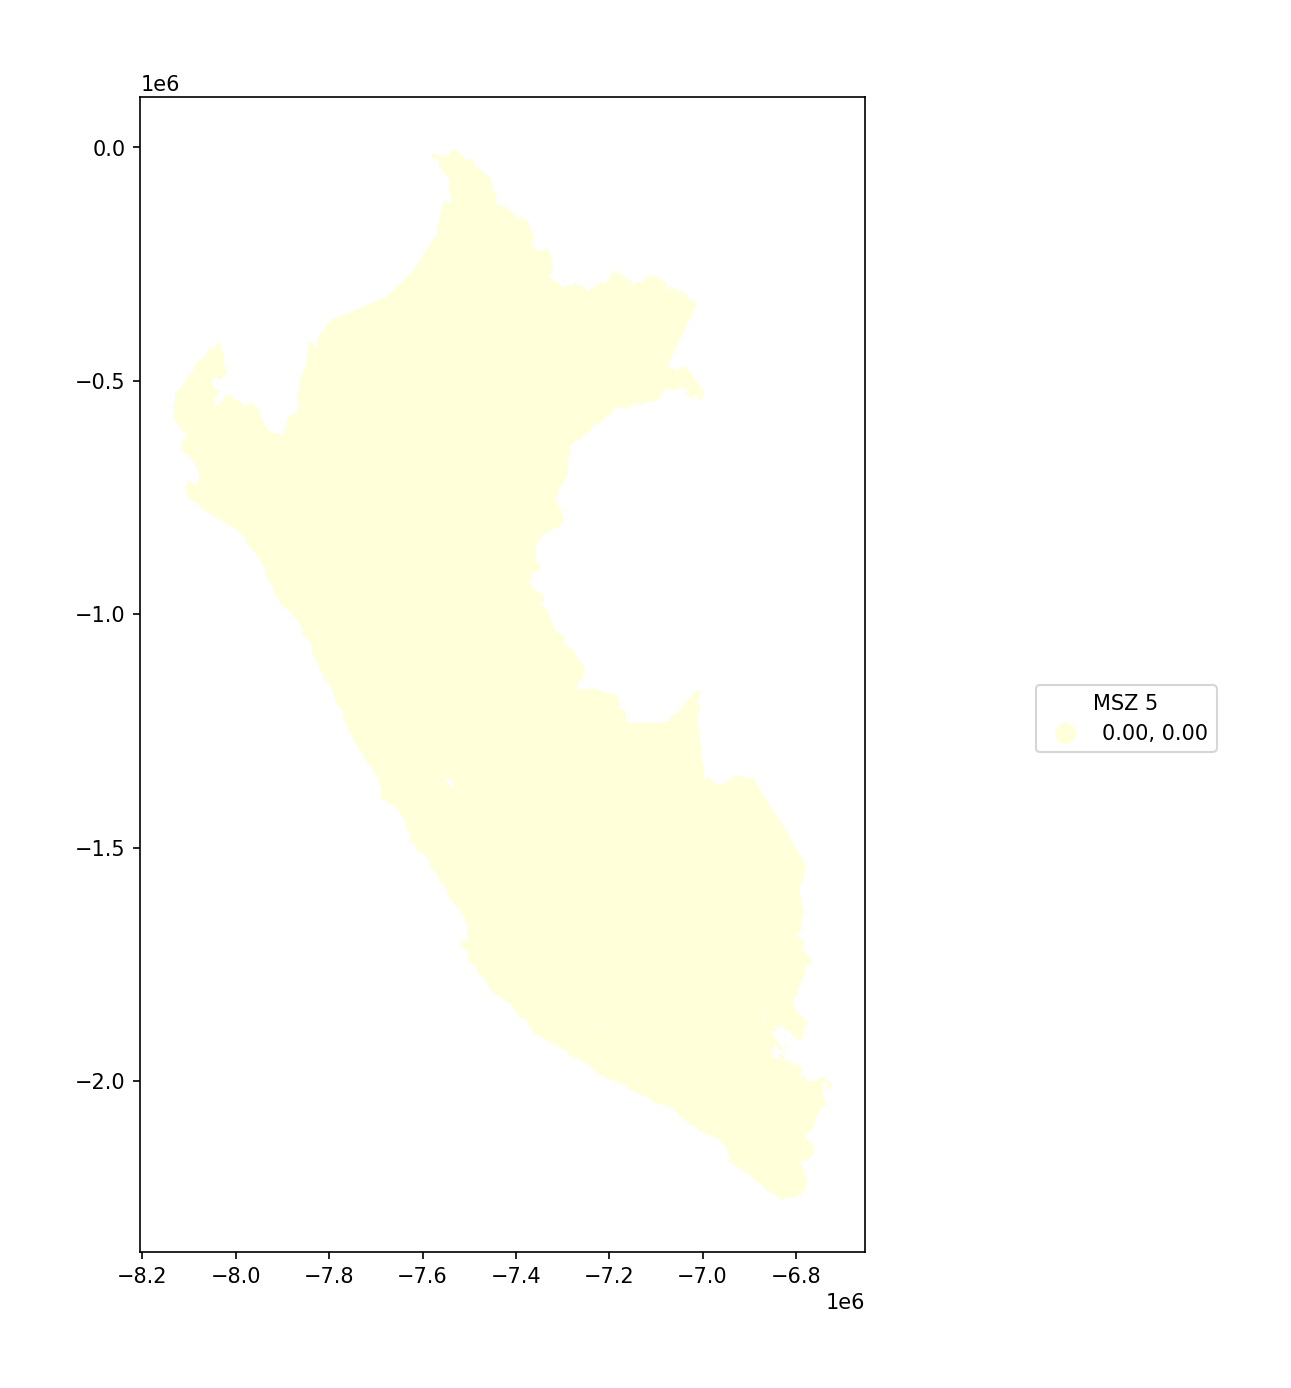

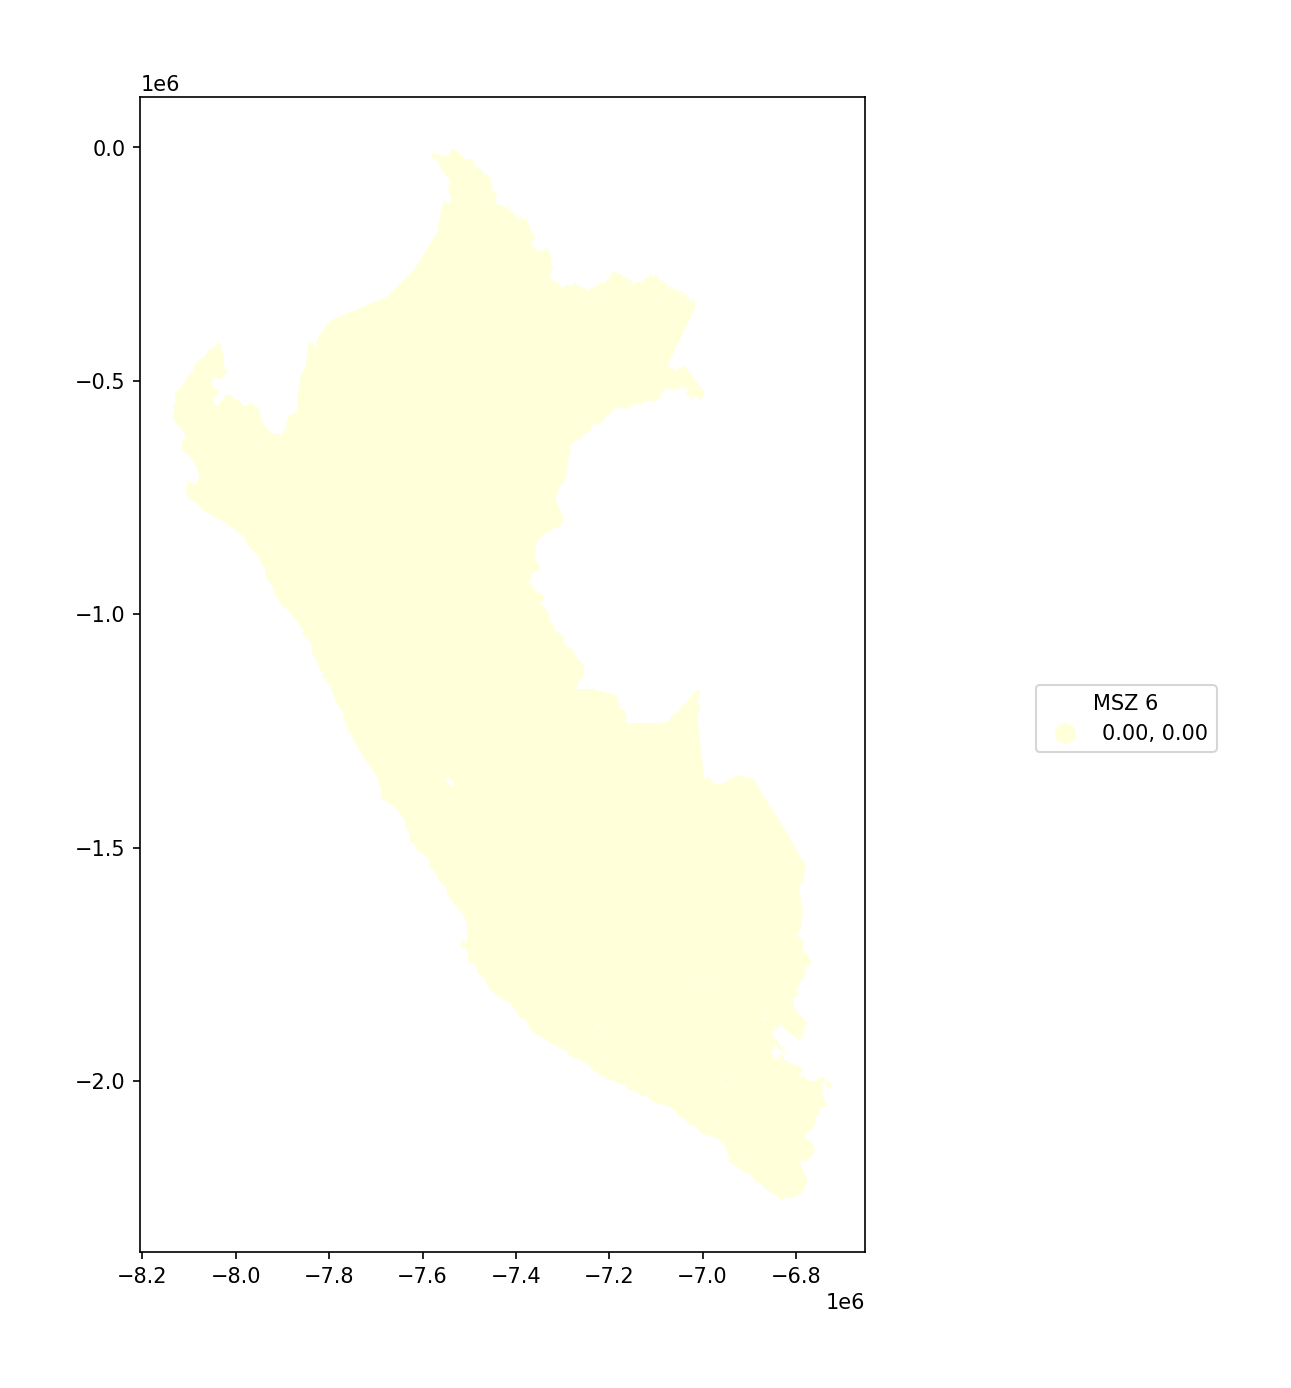

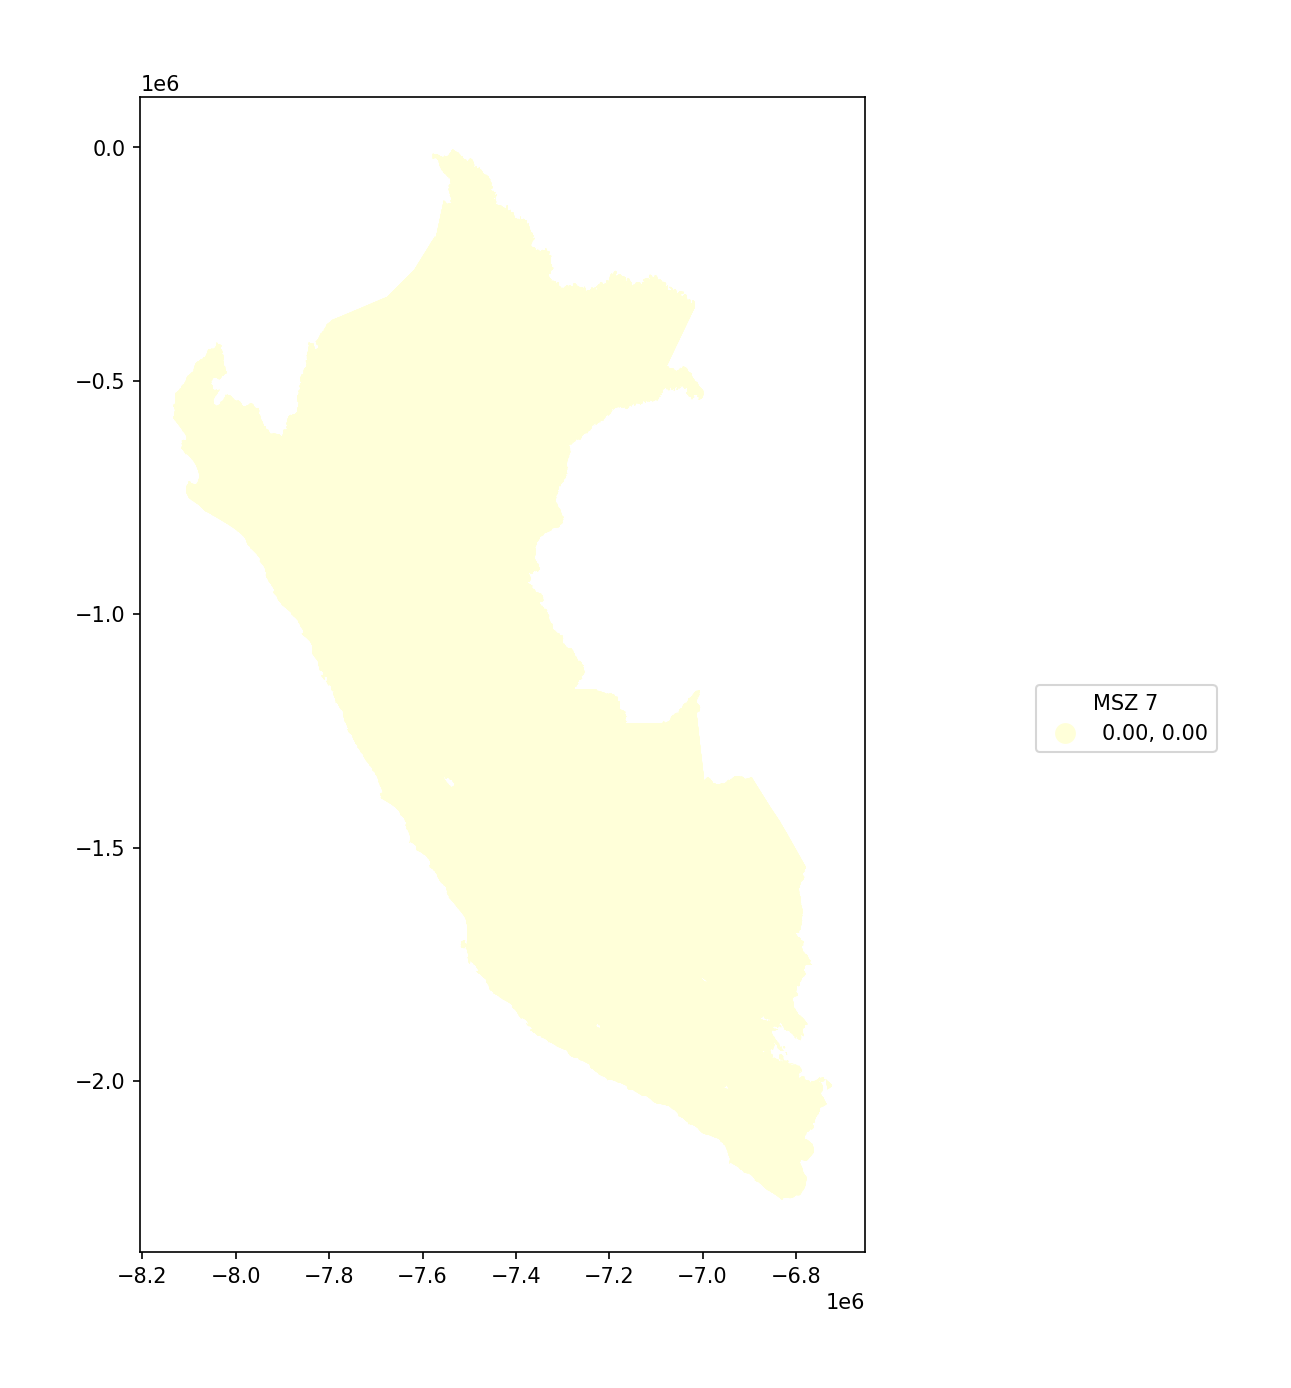

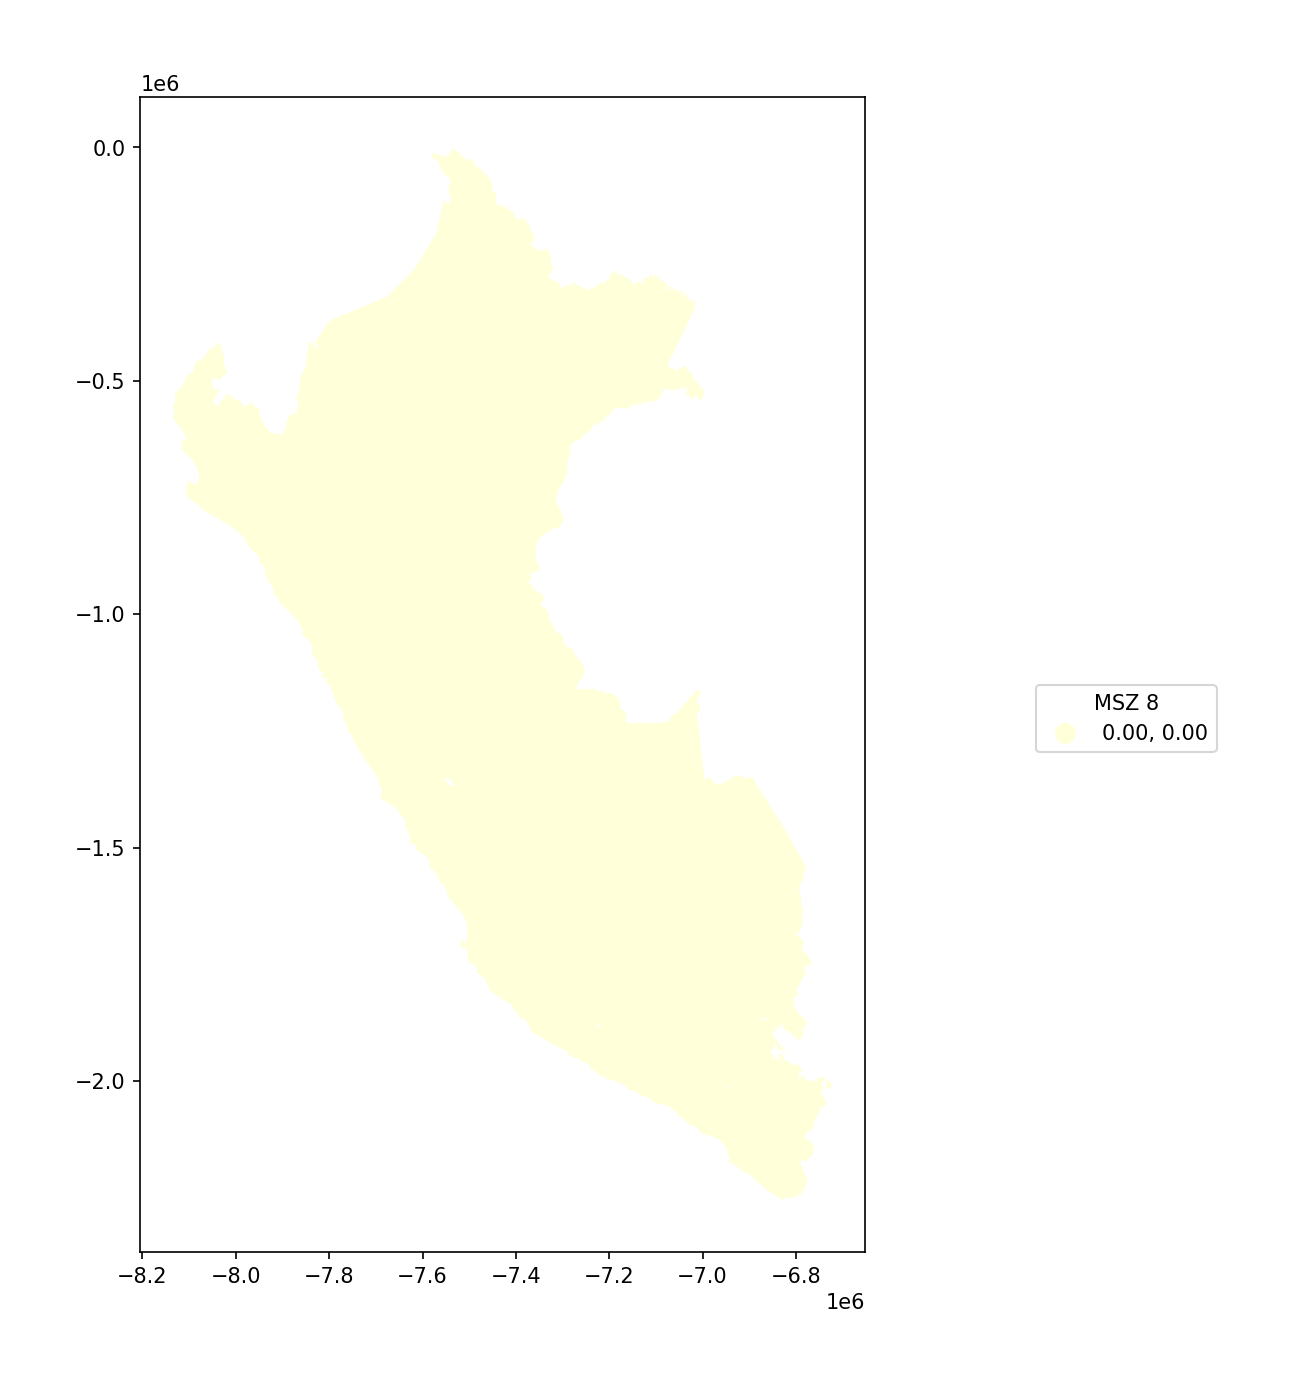

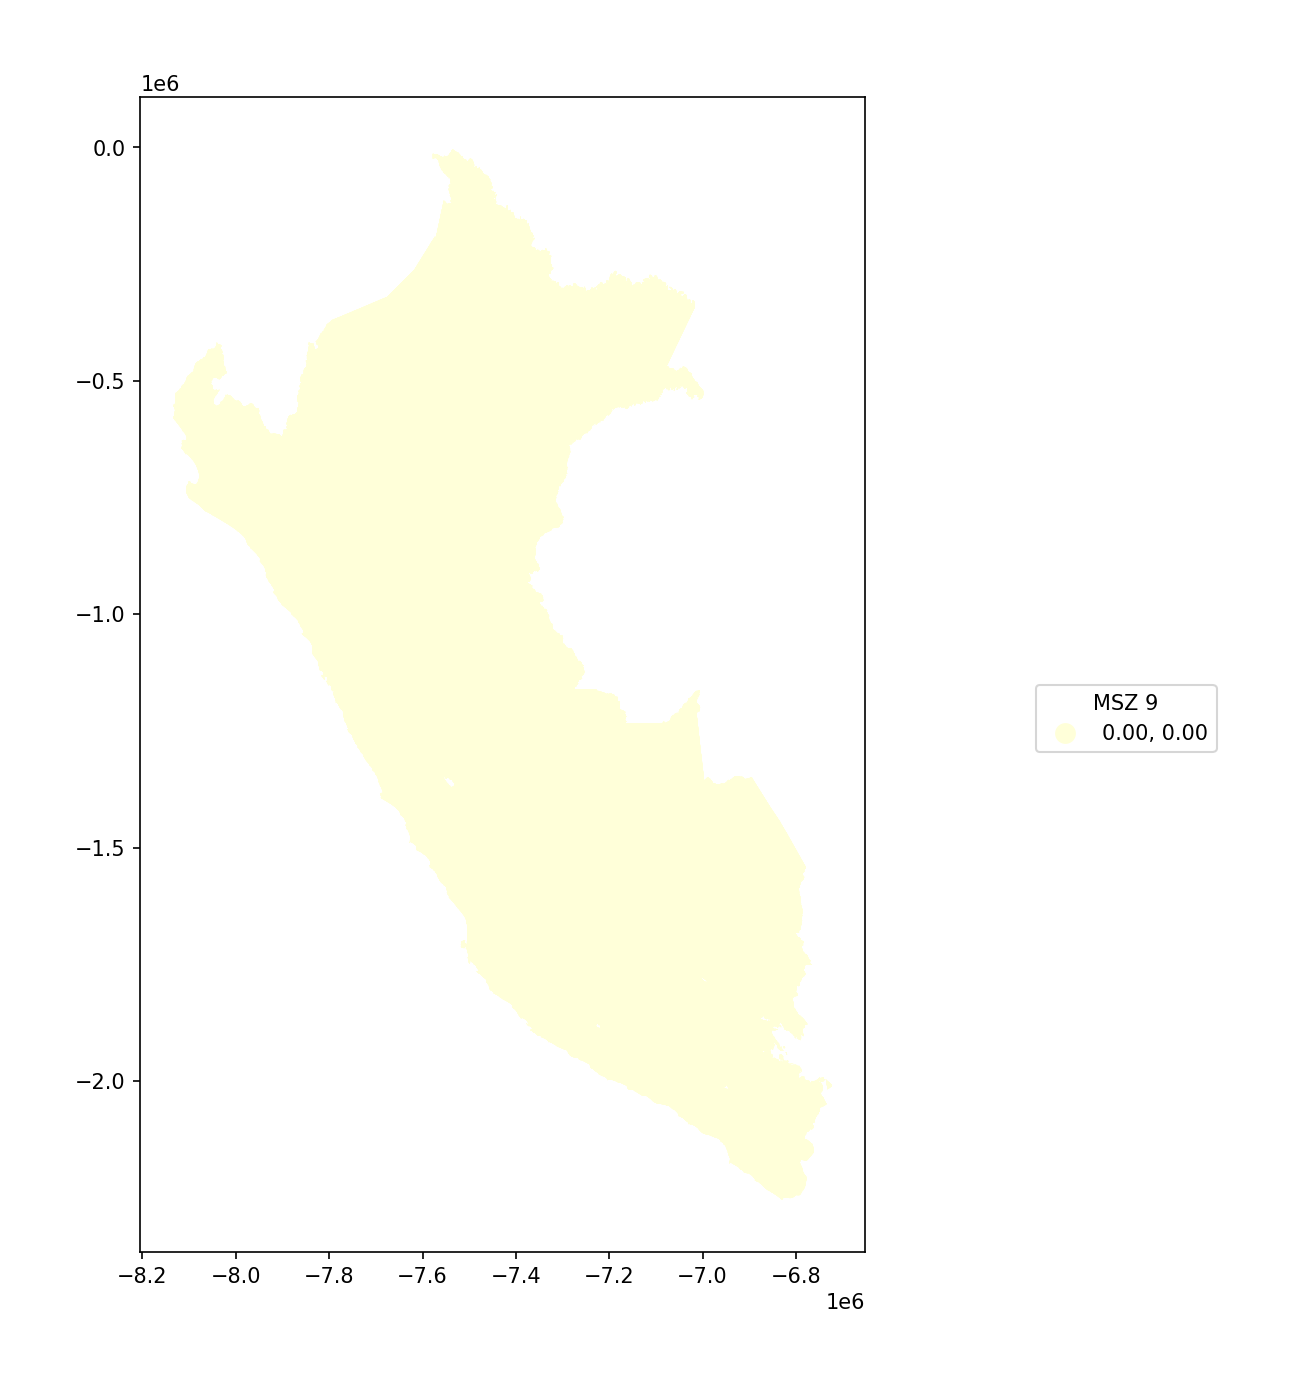

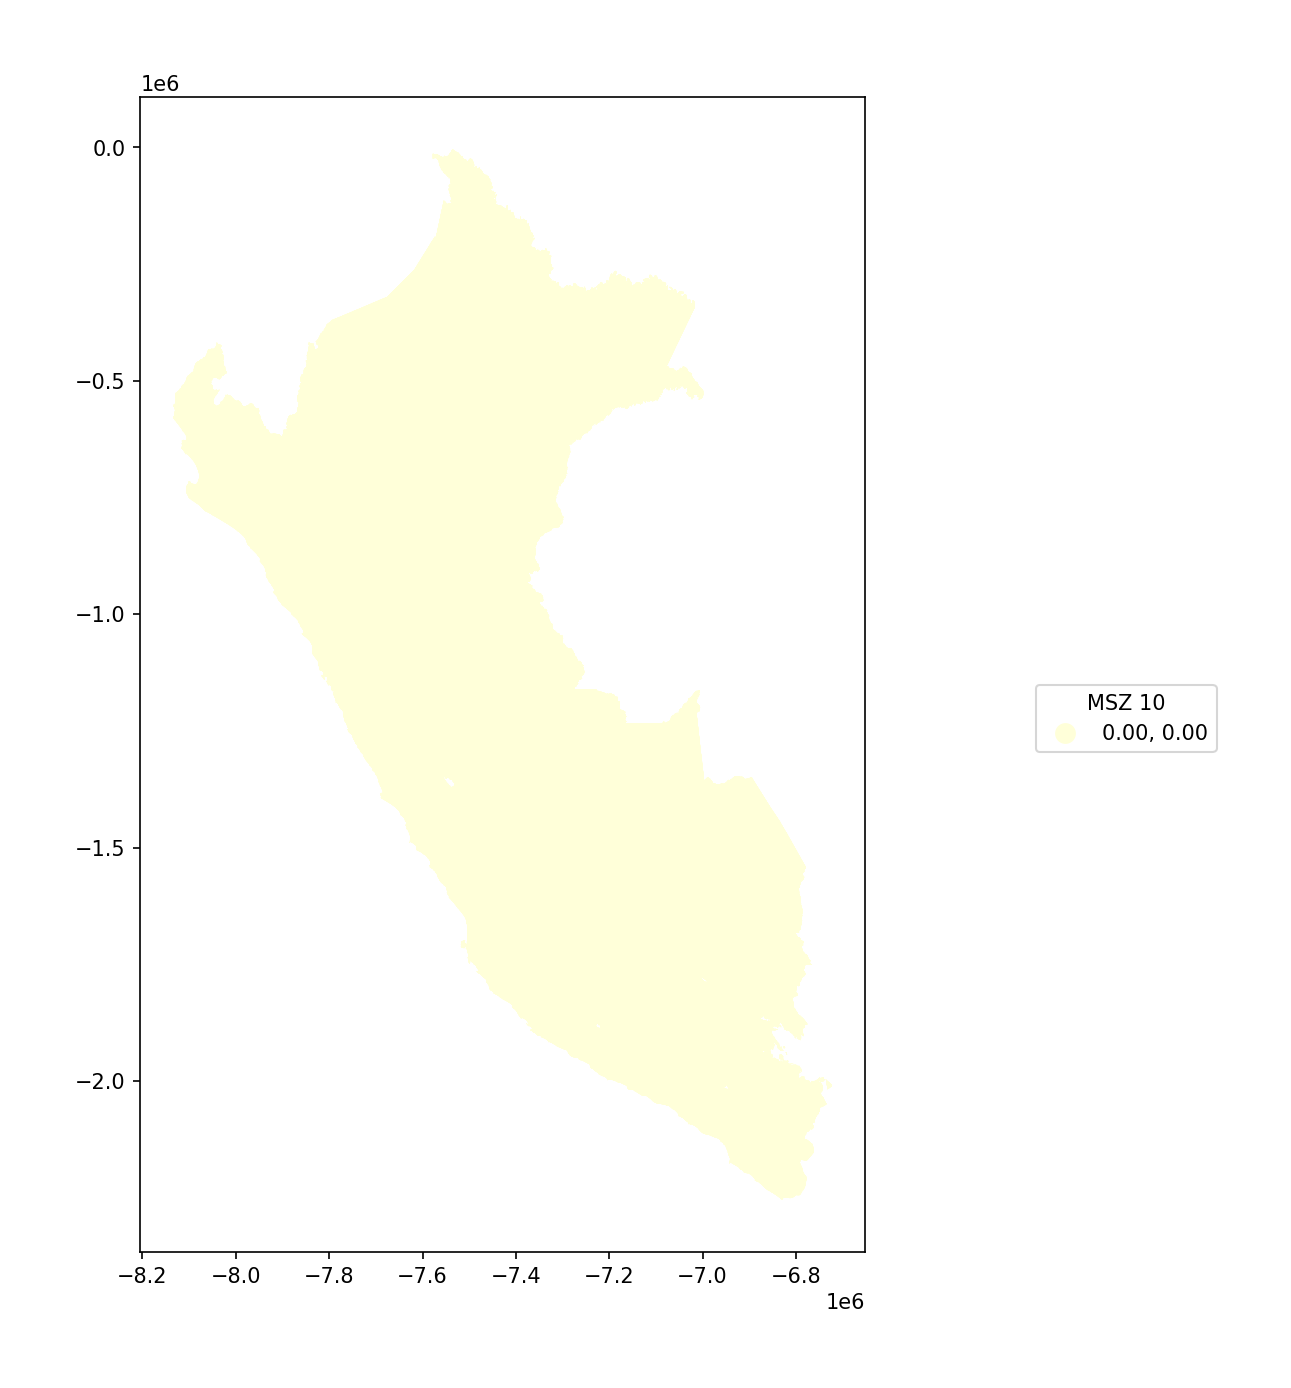

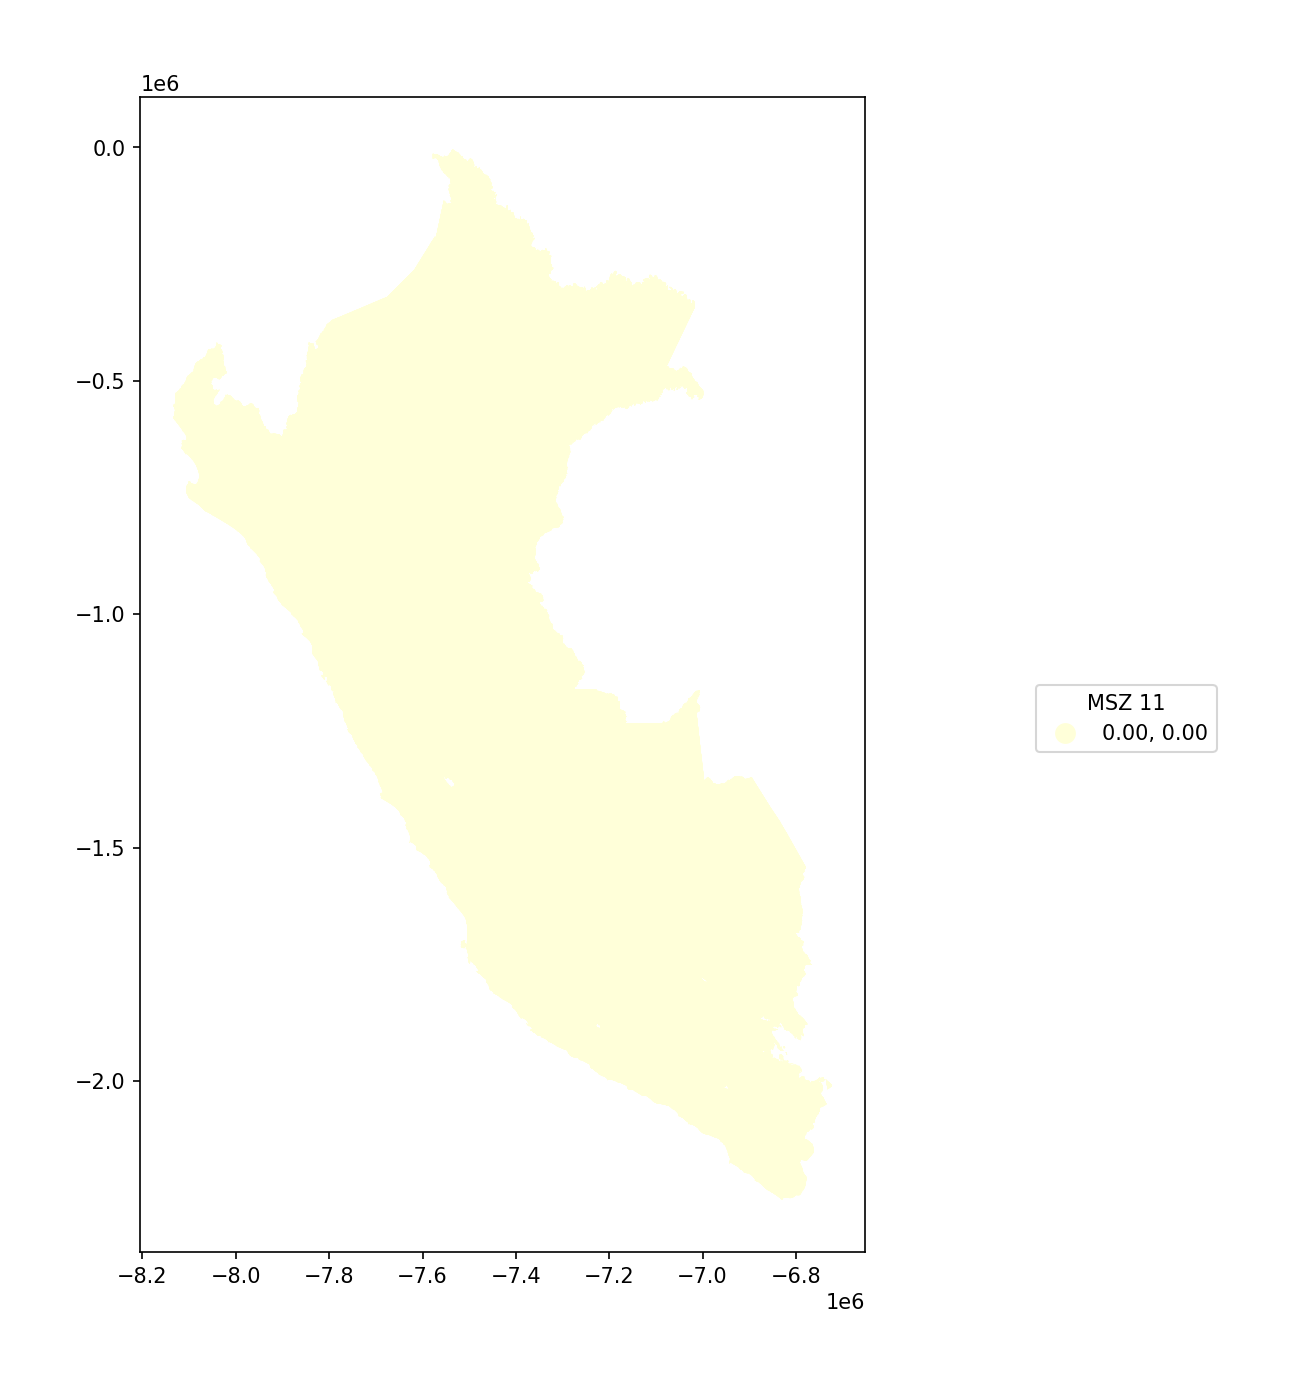

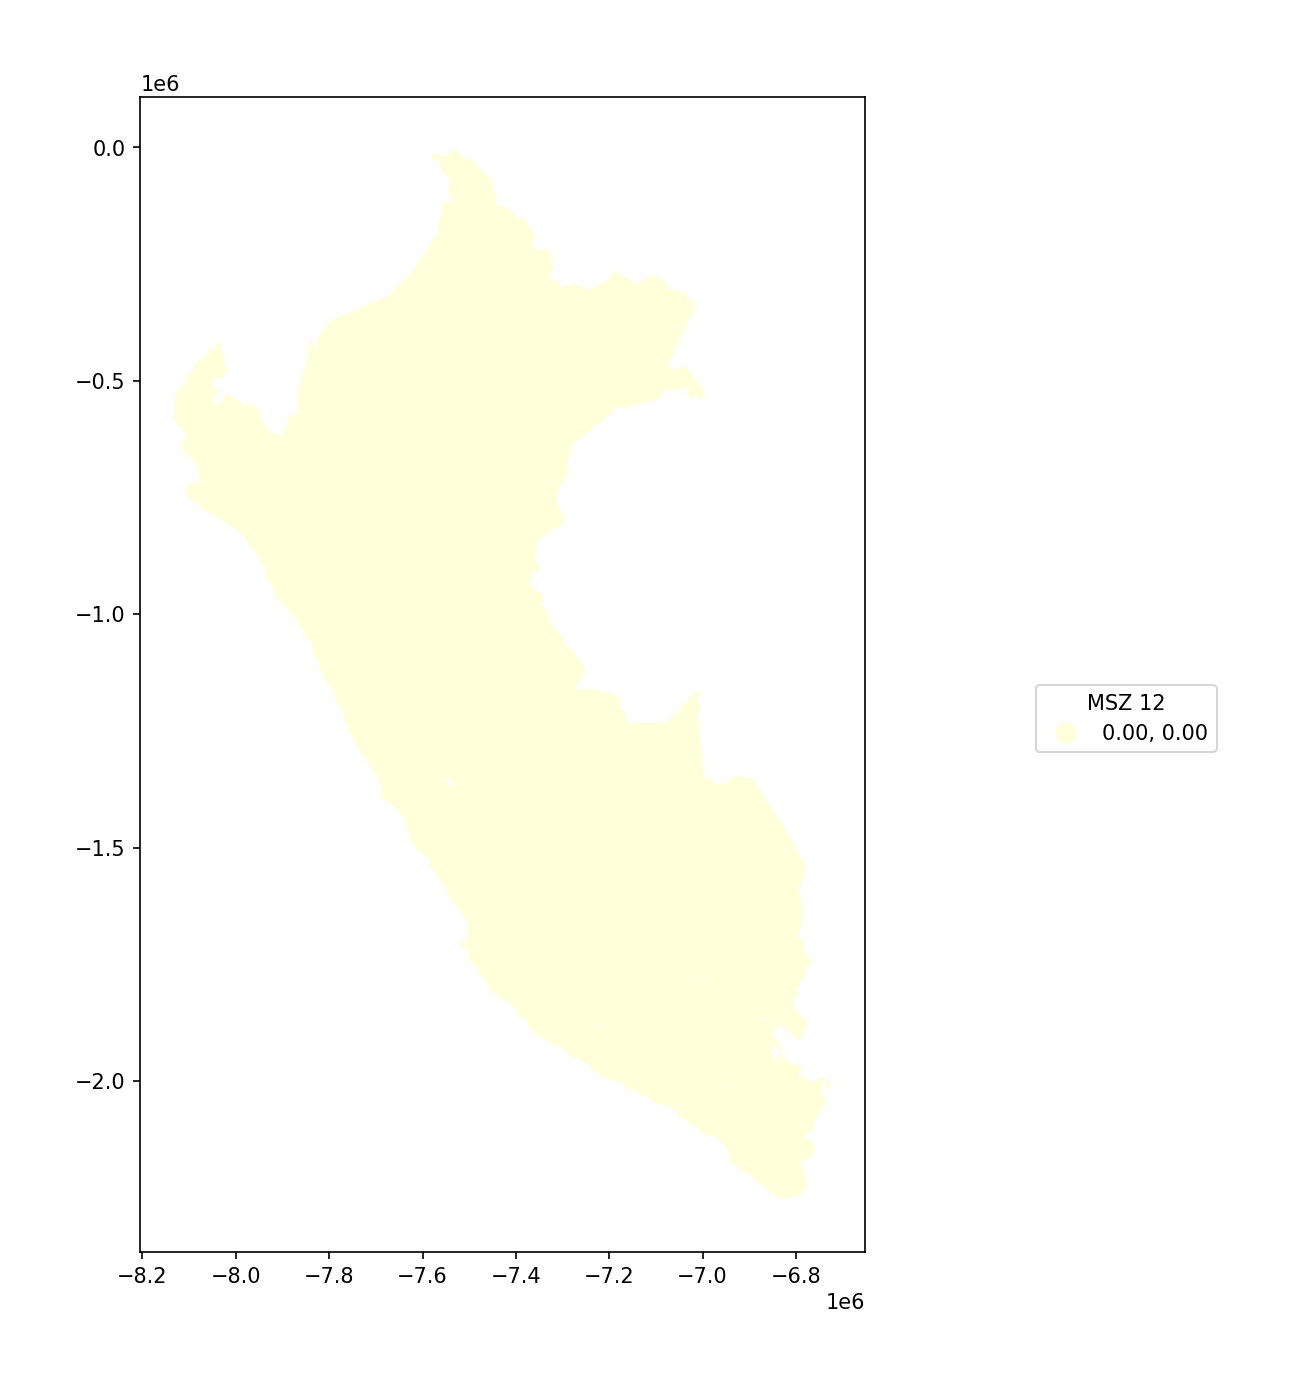

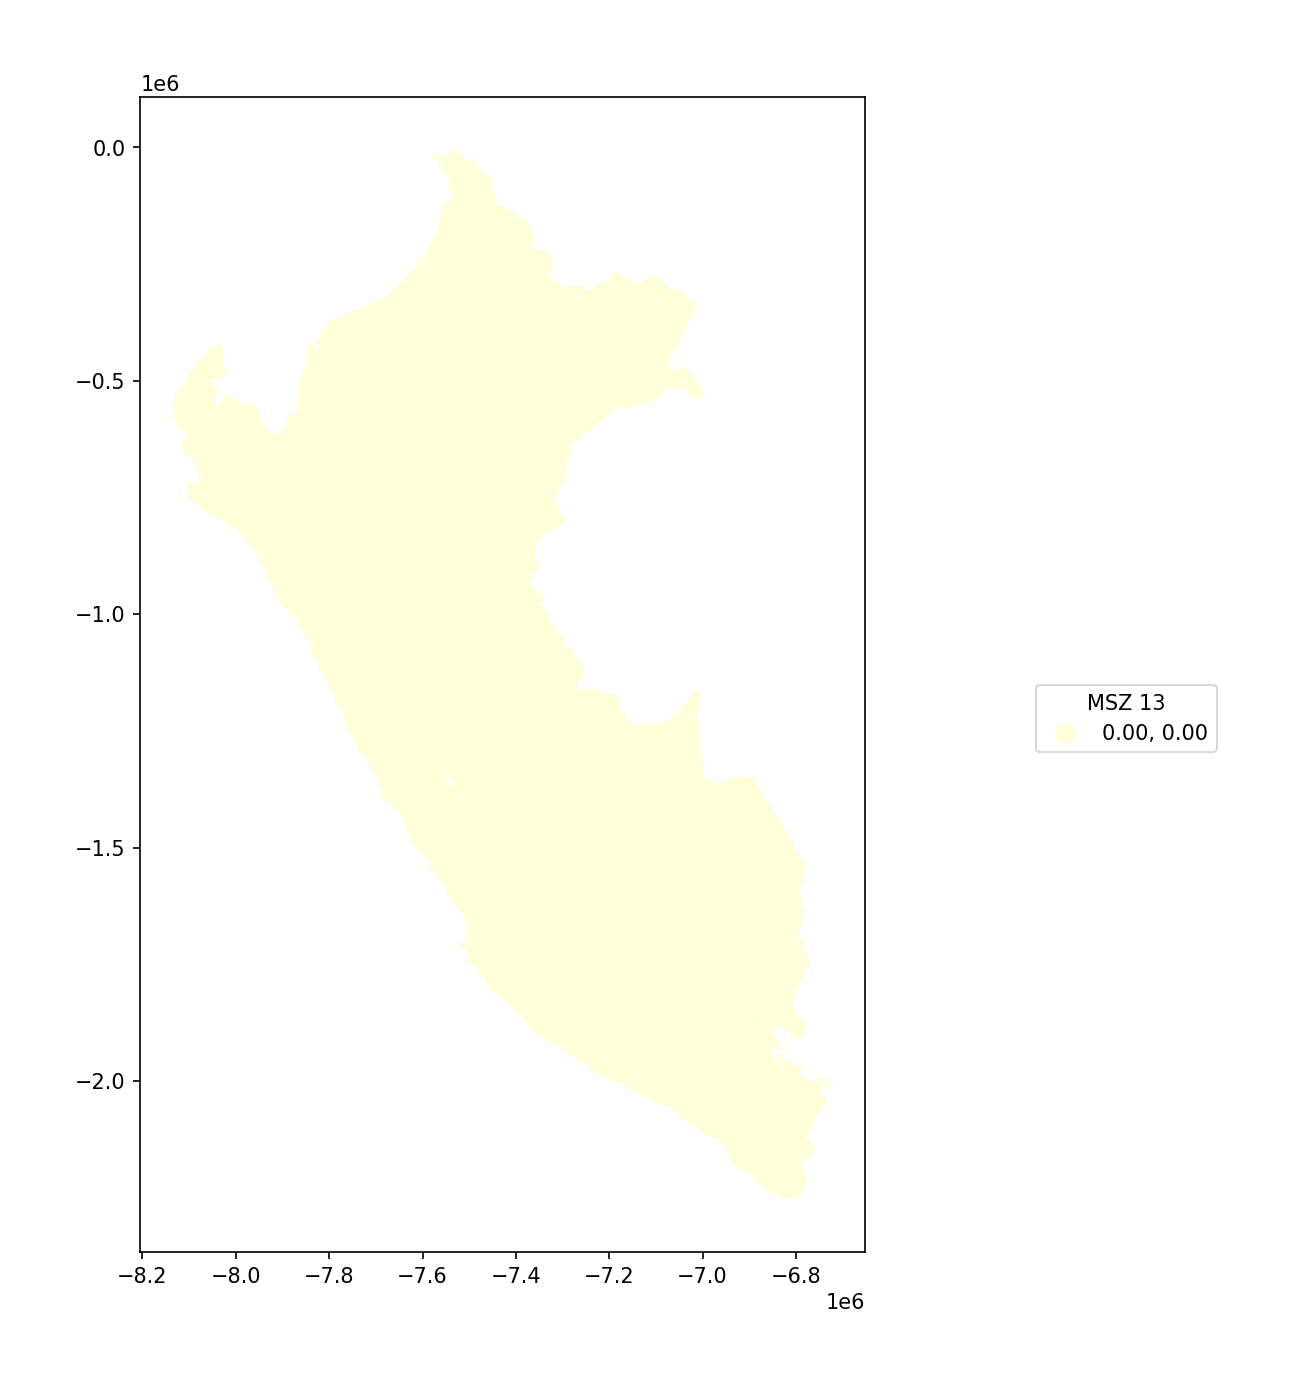

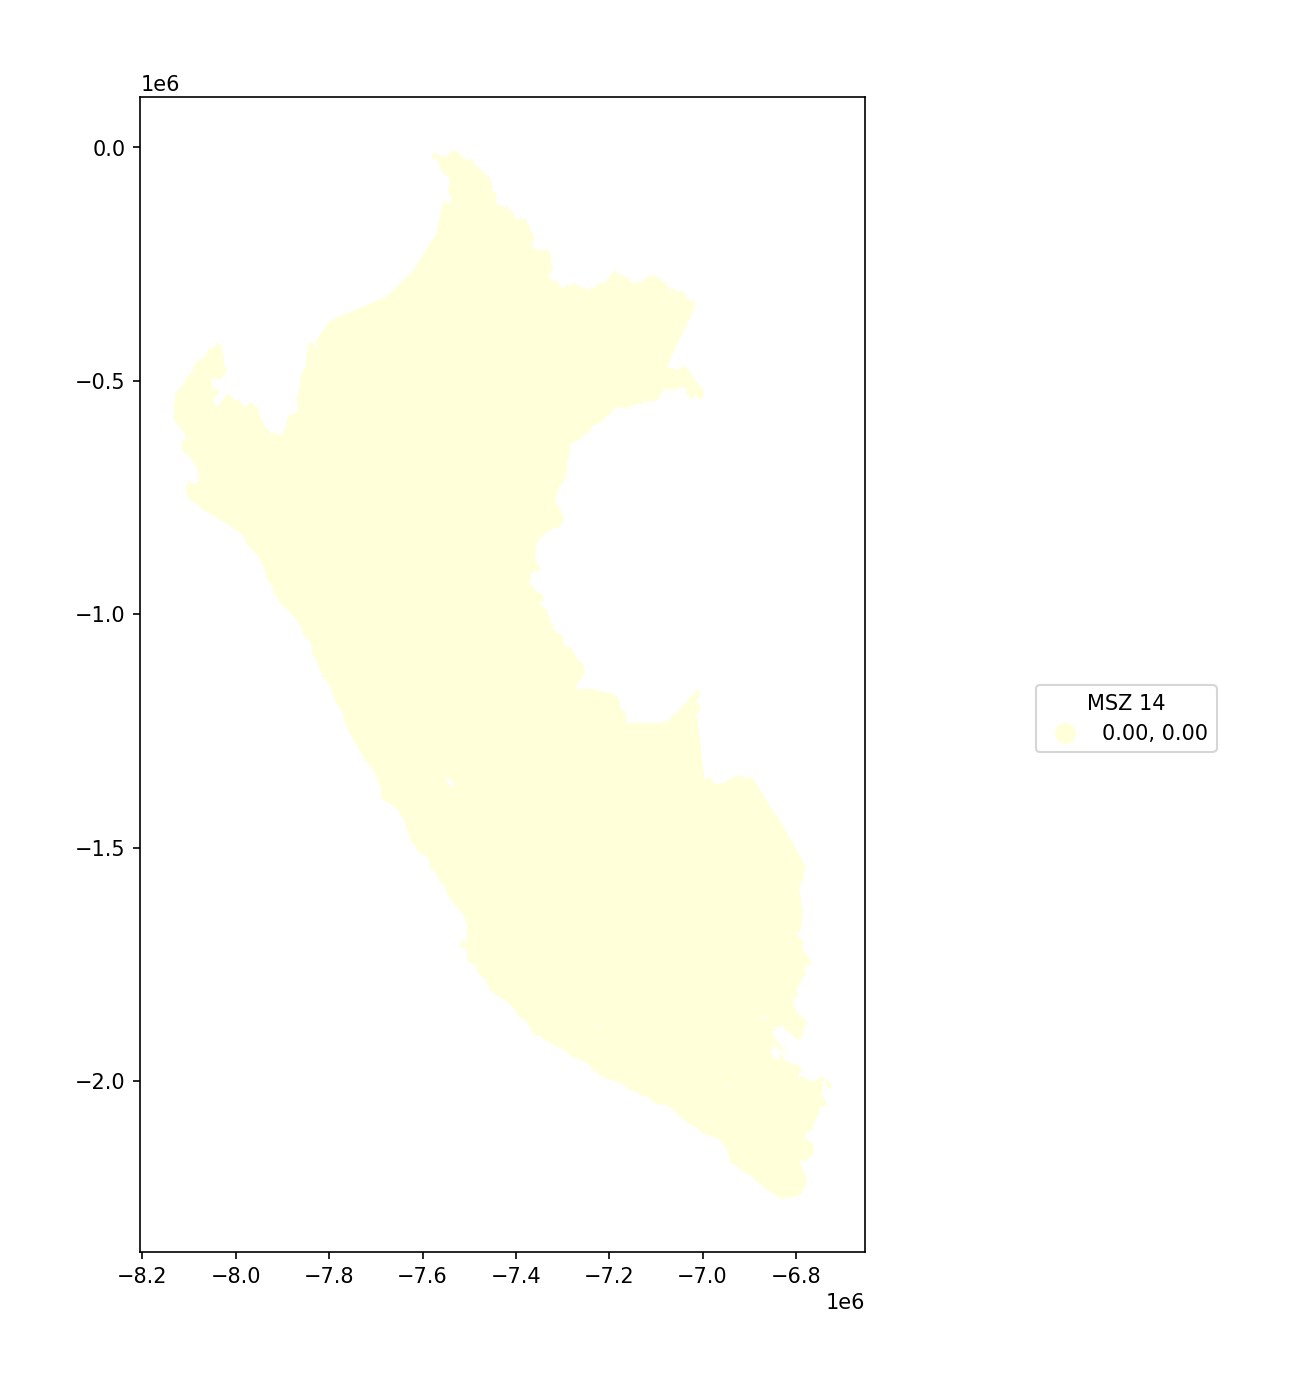

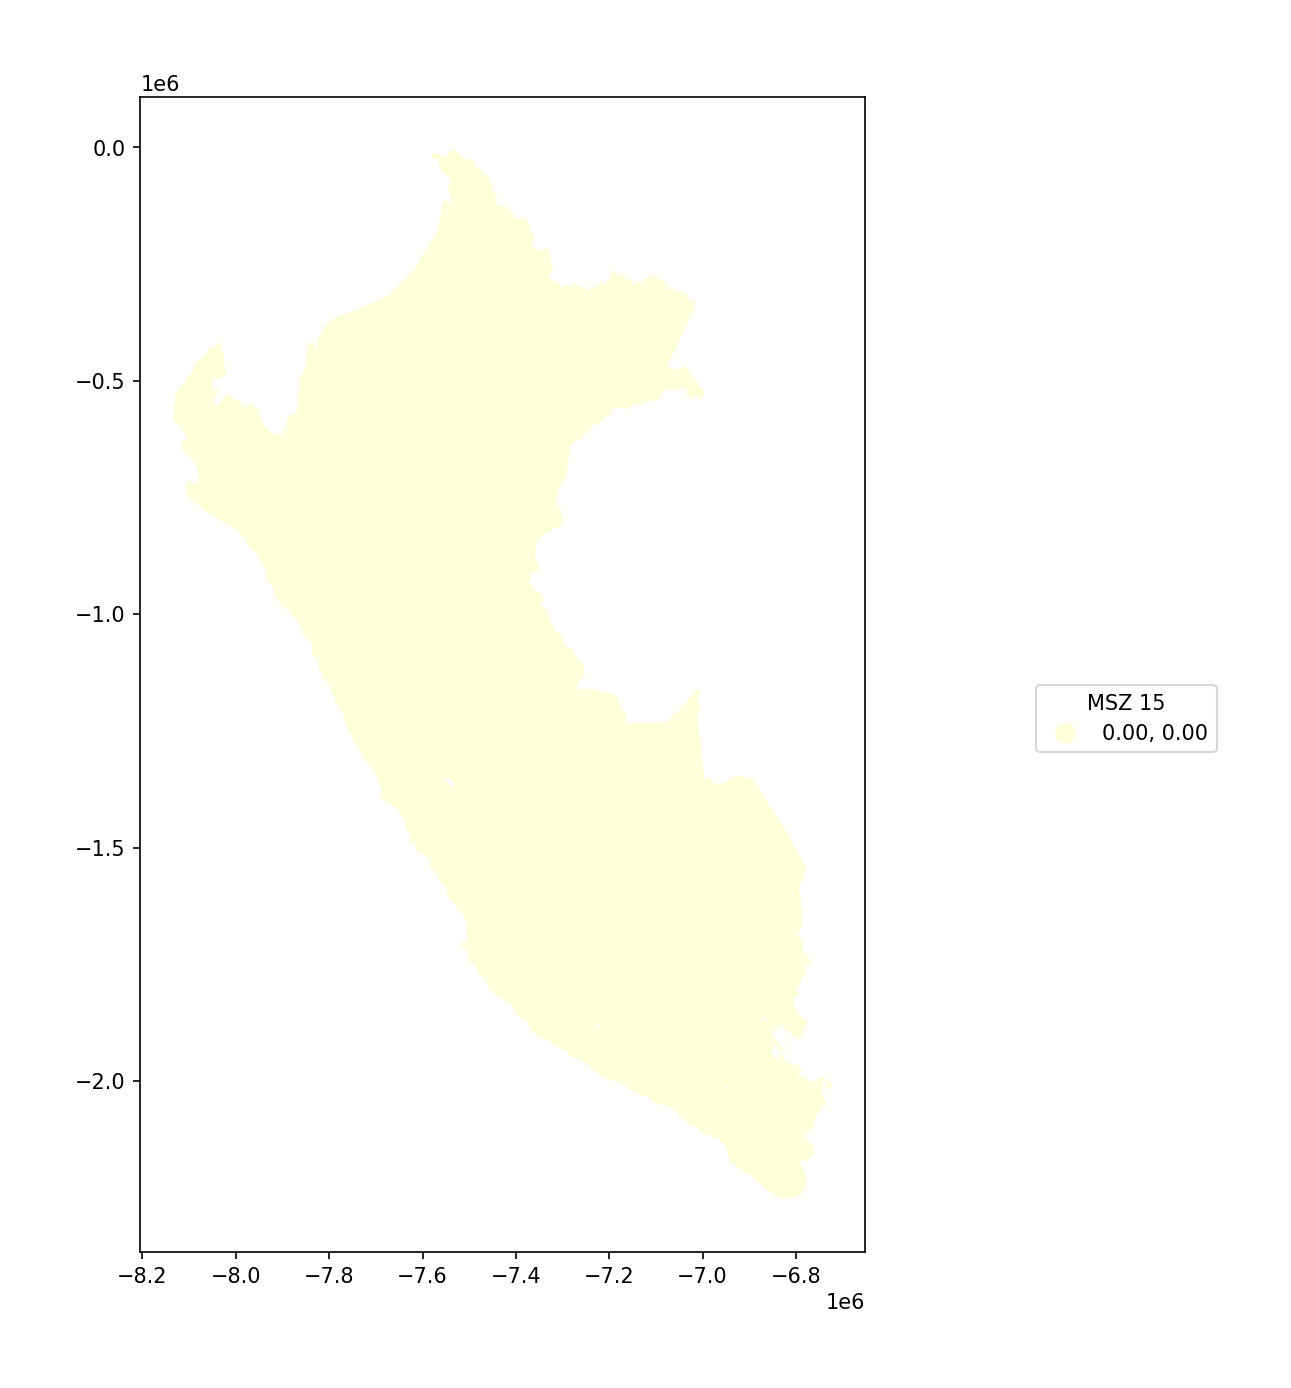

In [72]:
for i in range(1, 16):
    column_name = f'MSZ_{i}_coverage'
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    final_df.plot(
        column=column_name,
        cmap='YlGnBu',
        legend=True,
        scheme='quantiles',
        ax=ax
    )

    # Manually configure the legend
    leg = ax.get_legend()
    leg.set_title(f'MSZ {i}')
    leg.set_bbox_to_anchor((1.5, 0.5))

    plt.show()